In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow.compat.v2 as tf

In [3]:
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
x_train[2].shape

(28, 28)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img

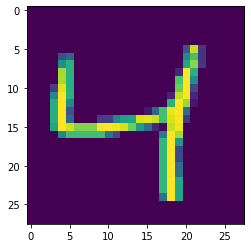

In [9]:
plt.imshow(x_train[2])

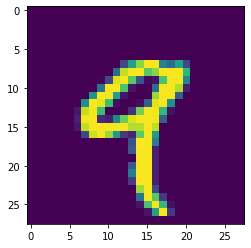

In [10]:
plt.imshow(x_train[4])

In [11]:
y_train[4]

9

In [12]:
type(x_train[4])

numpy.ndarray

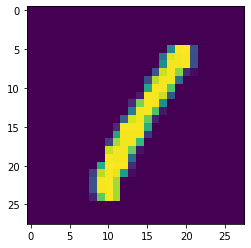

In [13]:
plt.imshow(x_train[3])

In [14]:
y_train[3]

1

In [15]:
y_test[3]

0

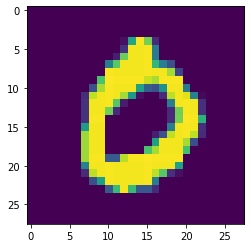

In [16]:
plt.imshow(x_test[3])

In [17]:
len(x_test)

10000

In [18]:
28*28

784

In [19]:
x3=np.reshape(x_test[3],(-1,1))

In [20]:
x3.shape

(784, 1)

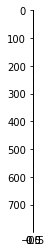

In [21]:
plt.imshow(x3)

In [22]:
x_train=np.array(x_train,np.float32)

In [23]:
x_test=np.array(x_test,np.float32)

In [24]:
x_train=x_train.reshape([-1,784])

In [25]:
x_test=x_test.reshape([-1,784])

In [26]:
np.shape(x_train[2])

(784,)

In [27]:
x_train=x_train/255.

In [28]:
x_test=x_test/255.

In [29]:
num_classes=10
num_features=784

learning_rate=0.01
training_steps=1000

batch_size=256
display_steps=50


# Shuffle the data and labels

In [32]:
train_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))

train_data=train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Defining the variables

In [48]:
W=tf.Variable(tf.ones([num_features,num_classes]),name='weight')

b=tf.Variable(tf.zeros([num_classes]),name='biase')

In [49]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x,W)+b)

# Cross-entropy loss function

In [50]:
def cross_entropy(y_pred,y_true):
    y_true=tf.one_hot(y_true,depth=num_classes)
    y_pred=tf.clip_by_value(y_pred,1e-9,1.)
    temp=y_true*tf.math.log(y_pred)
    kl=-tf.reduce_sum(temp)
    return tf.reduce_mean(kl)

# Accuracy

In [51]:
tf.equal(2,2)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [52]:
def accuracy(y_pred,y_true):
    correct_prediction=tf.equal(tf.argmax(y_pred,1),tf.cast(y_true,tf.int64))
    
    return tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    

In [53]:
optimizer=tf.optimizers.SGD(learning_rate)

In [54]:
def run_optimization(x,y):
    with tf.GradientTape() as g:
        pred=logistic_regression(x)
        loss=cross_entropy(pred,y)
        
    gradient=g.gradient(loss,[W,b])
    
    optimizer.apply_gradients(zip(gradient,[W,b]))

In [55]:
for step, (batch_x,batch_y) in enumerate(train_data.take(training_steps),1):
    run_optimization(batch_x,batch_y)
    
    if step % display_steps == 0:
        pred=logistic_regression(batch_x)
        loss=cross_entropy(pred,batch_y)
        
        acc=accuracy(pred,batch_y)
        
        print('steps:%i, loss: %f, accuracy: %f'%(step,loss,acc))
        
        
        
        

steps:50, loss: 176.980499, accuracy: 0.839844
steps:100, loss: 80.387009, accuracy: 0.933594
steps:150, loss: 81.439926, accuracy: 0.921875
steps:200, loss: 89.881714, accuracy: 0.917969
steps:250, loss: 51.453724, accuracy: 0.953125
steps:300, loss: 87.553932, accuracy: 0.929688
steps:350, loss: 57.344837, accuracy: 0.933594
steps:400, loss: 82.931030, accuracy: 0.890625
steps:450, loss: 81.272362, accuracy: 0.925781
steps:500, loss: 47.293983, accuracy: 0.929688
steps:550, loss: 259.340118, accuracy: 0.843750
steps:600, loss: 88.144165, accuracy: 0.910156
steps:650, loss: 103.715836, accuracy: 0.855469
steps:700, loss: 108.930893, accuracy: 0.886719
steps:750, loss: 55.472786, accuracy: 0.941406
steps:800, loss: 48.955009, accuracy: 0.957031
steps:850, loss: 117.000366, accuracy: 0.890625
steps:900, loss: 33.764713, accuracy: 0.945312
steps:950, loss: 67.862381, accuracy: 0.917969
steps:1000, loss: 91.769638, accuracy: 0.878906


In [56]:
pred=logistic_regression(x_test)

print('Accuracy: %f'% accuracy(pred,y_test))

Accuracy: 0.864100


In [57]:
import matplotlib.image as img

In [58]:
image=img.imread('rabbit.jpg')

In [59]:
type(image)

numpy.ndarray

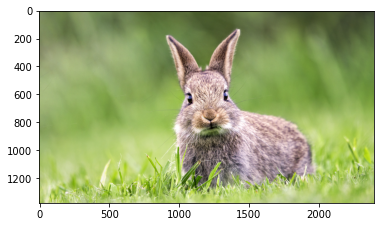

In [60]:
plt.imshow(image)

In [70]:
rabbit=np.reshape(image,(-1,400))

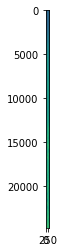

In [71]:
plt.imshow(rabbit)